<a href="https://colab.research.google.com/github/cabreralucas95/proyectos-data/blob/main/proyecto_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para descargar el dataset haga click en el siguiente link: https://drive.google.com/file/d/1TATo5-RG3K24SHYeagLI177c6jeEDLdX/view?usp=sharing 

In [ ]:
from google.colab import files
files.upload()

Saving vgsales.csv to vgsales.csv


{'vgsales.csv': b'Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales\n1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74\n2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24\n3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82\n4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33\n5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37\n6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26\n7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01\n8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02\n9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62\n10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31\n11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11,1.93,2.75,24.76\n12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42\n13,Pokemon Gold/Pokemon Silver,GB,1999,Ro

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv ("vgsales.csv", sep = ",", index_col = 0)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


#Preprocesamiento de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


##Observamos nulos

In [ ]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
##observamos qué porcentaje de nulos posee cada columna
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

Year's null rate : 1.6327268345583803%
Publisher's null rate : 0.3494396915290999%


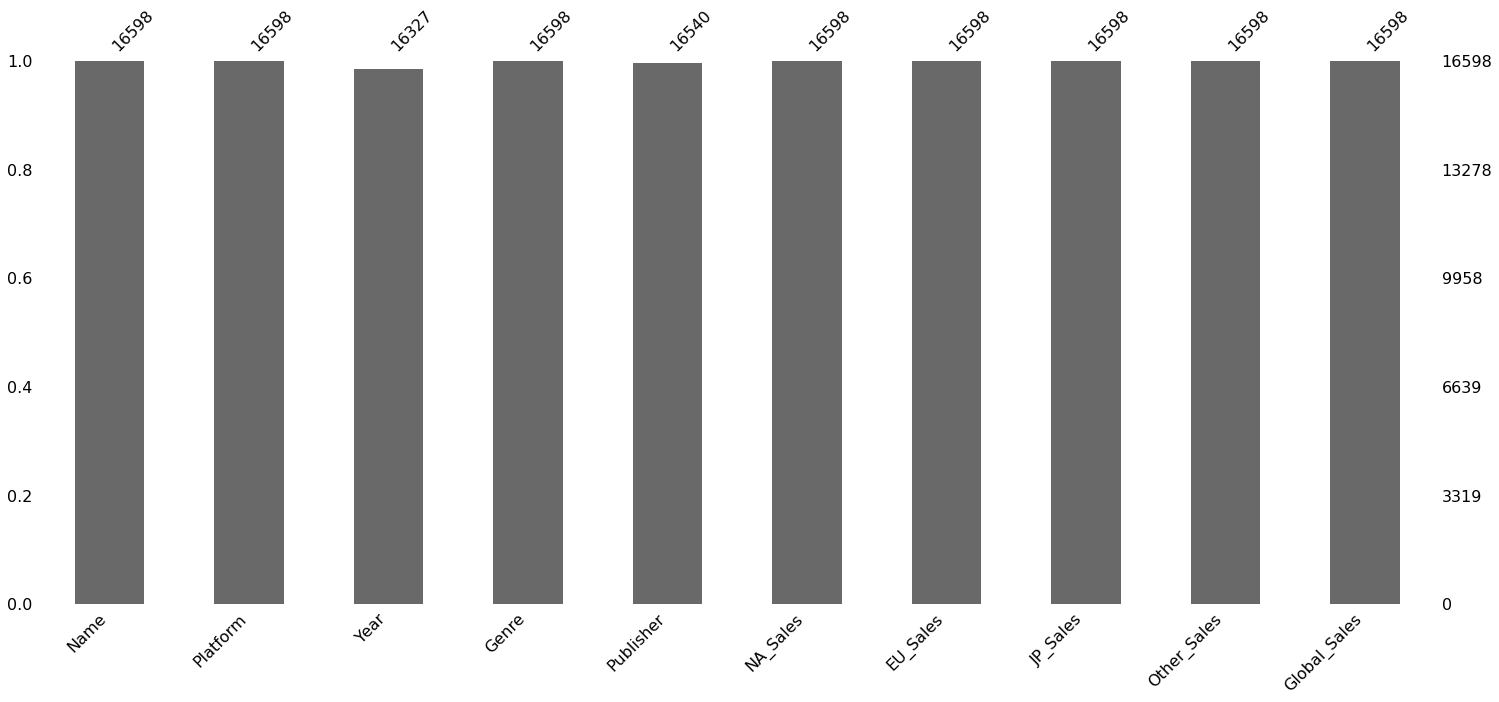

<Figure size 864x576 with 0 Axes>

In [ ]:
##Ahora chequeamos, visualmente cómo se ve esa falta de datos con la librería missingno
import missingno as msno
msno.bar(df)
plt.figure(figsize=(12, 8))
plt.show()

In [ ]:
##Contamos los elementos únicos de las columnas con nulos
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
##Contamos los elementos únicos de las columnas con nulos
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Decisiones sobre las columnas con datos nulos:
- Col Year: podríamos completarlos por los datos más cercanos a la posición si estuvieran en orden cronológico, pero no lo están; y ninguna otra forma (como moda, media o mediana) tendría sentido en esta columna. Por lo tanto eliminaremos las filas de datos faltantes ya que el porcentaje que representan los nulos no es significativo.
- Col Publisher: ya que son pocos (menos del 1% de la columna), eliminaremos esas filas también.

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(16291, 10)

In [ ]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
##Transformamos Year a entero
df.Year=df.Year.astype(int)


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
#Transformamos la col Year en datetime
df["Year"]=pd.to_datetime(df["Year"],format="%Y")

<ipython-input-17-40fd1347ac86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"]=pd.to_datetime(df["Year"],format="%Y")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          16291 non-null  object        
 1   Platform      16291 non-null  object        
 2   Year          16291 non-null  datetime64[ns]
 3   Genre         16291 non-null  object        
 4   Publisher     16291 non-null  object        
 5   NA_Sales      16291 non-null  float64       
 6   EU_Sales      16291 non-null  float64       
 7   JP_Sales      16291 non-null  float64       
 8   Other_Sales   16291 non-null  float64       
 9   Global_Sales  16291 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.4+ MB


In [ ]:
##Chequeamos cómo se visualiza una posición
df.Year[1]

Timestamp('2006-01-01 00:00:00')

In [ ]:
##Ya que necesitamos que el formato de Year nos muestre solo el año, pero la función ".year" no puede aplicarse a series, creamos entonces una función para aplicarla a cada instancia de la columna.
def change_year (a):
	return a.year

In [ ]:
#Aplicamos la funcion change_year a cada instancia de la columna Year que (ya es de tipo datetime) para que en el resultado solo nos muestre el año.
df["Year"] = df["Year"].apply (change_year)

<ipython-input-21-ceb0429c4ee5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Year"].apply (change_year)


In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
##verificamos cómo se muestra
df.Year[1]

2006

##Variables sintéticas

Aplicaremos un encoding sobre la columna de Genre, en donde los datos sólo serán los correspondientes al top 3 de los más vendido:
"Action","Sports" y "Shooter".

In [ ]:
# generar un df que solo contenga "Action","Sports" y "Shooter" en la columna “Genre”. Lo llamaremos df_genre.
df_genre = df.loc[(df['Genre'] == 'Action') | (df['Genre'] == "Sports")| (df['Genre'] == "Shooter")]
print(df_genre)

                                                    Name Platform  Year  \
Rank                                                                      
1                                             Wii Sports      Wii  2006   
4                                      Wii Sports Resort      Wii  2009   
10                                             Duck Hunt      NES  1984   
14                                               Wii Fit      Wii  2007   
15                                          Wii Fit Plus      Wii  2009   
...                                                  ...      ...   ...   
16586                                     Carmageddon 64      N64  1999   
16588                                             Breach       PC  2011   
16590                           Mezase!! Tsuri Master DS       DS  2009   
16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV  2016   
16597                      Men in Black II: Alien Escape       GC  2003   

         Genre          

In [ ]:
df_genre.shape

(6837, 10)

In [ ]:
df_genre.head

<bound method NDFrame.head of                                                     Name Platform  Year  \
Rank                                                                      
1                                             Wii Sports      Wii  2006   
4                                      Wii Sports Resort      Wii  2009   
10                                             Duck Hunt      NES  1984   
14                                               Wii Fit      Wii  2007   
15                                          Wii Fit Plus      Wii  2009   
...                                                  ...      ...   ...   
16586                                     Carmageddon 64      N64  1999   
16588                                             Breach       PC  2011   
16590                           Mezase!! Tsuri Master DS       DS  2009   
16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV  2016   
16597                      Men in Black II: Alien Escape       GC  200

In [ ]:
#reseteamos index y dejamos la columna Rank que mantiene la ubicación real en el ranking de df original.
df_genre=df_genre.reset_index()
df_genre

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
3,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
4,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
...,...,...,...,...,...,...,...,...,...,...,...
6832,16586,Carmageddon 64,N64,1999,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01
6833,16588,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
6834,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01
6835,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


In [ ]:
#para terminar de confirmar, contamos cuántos valores de "Action","Sports" y "Shooter" tenemos en df_genre
df_genre["Genre"].value_counts()

Action     3251
Sports     2304
Shooter    1282
Name: Genre, dtype: int64

###One Hot con get_dummies

In [ ]:
#aplicamos get_dummies para usar la técnica de one hot encoding en df_genre
dummy_genre = pd.get_dummies(df_genre["Genre"], prefix= "genre")

In [ ]:
#visualizamos el resultado
dummy_genre.head()

,genre_Action,genre_Shooter,genre_Sports
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [ ]:
#eliminamos la columna de genre porque ya no es útil
df_genre = df_genre.drop(["Genre"], axis= 1)
df_genre

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Nintendo,41.49,29.02,3.77,8.46,82.74
1,4,Wii Sports Resort,Wii,2009,Nintendo,15.75,11.01,3.28,2.96,33.00
2,10,Duck Hunt,NES,1984,Nintendo,26.93,0.63,0.28,0.47,28.31
3,14,Wii Fit,Wii,2007,Nintendo,8.94,8.03,3.60,2.15,22.72
4,15,Wii Fit Plus,Wii,2009,Nintendo,9.09,8.59,2.53,1.79,22.00
...,...,...,...,...,...,...,...,...,...,...
6832,16586,Carmageddon 64,N64,1999,Virgin Interactive,0.01,0.00,0.00,0.00,0.01
6833,16588,Breach,PC,2011,Destineer,0.01,0.00,0.00,0.00,0.01
6834,16590,Mezase!! Tsuri Master DS,DS,2009,Hudson Soft,0.00,0.00,0.01,0.00,0.01
6835,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,dramatic create,0.00,0.00,0.01,0.00,0.01


In [ ]:
#concatenamos dummy_genre a df_genre en un nuevo df
df_genre_num = pd.concat([df_genre,dummy_genre], axis = 1)
df_genre_num.head()

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,genre_Action,genre_Shooter,genre_Sports
0,1,Wii Sports,Wii,2006,Nintendo,41.49,29.02,3.77,8.46,82.74,0,0,1
1,4,Wii Sports Resort,Wii,2009,Nintendo,15.75,11.01,3.28,2.96,33.00,0,0,1
2,10,Duck Hunt,NES,1984,Nintendo,26.93,0.63,0.28,0.47,28.31,0,1,0
3,14,Wii Fit,Wii,2007,Nintendo,8.94,8.03,3.60,2.15,22.72,0,0,1
4,15,Wii Fit Plus,Wii,2009,Nintendo,9.09,8.59,2.53,1.79,22.00,0,0,1


In [ ]:
#comprobamos en la forma de df_genre_num que se hayan adicionado las nuevas columnas
df_genre_num.shape

(6837, 13)

Hasta aquí, adicionamos columnas sintéticas.

#Data Storytelling

**Abstract:** El dataset “videogames” contiene una lista de videojuegos con ventas superiores a 100.000 copias desde el año 1980 al 2020. Los campos incluyen: Rank - Ranking de ventas totales, columna que hemos utilizado como index; Nombre - El nombre del juego; Plataform: plataforma del lanzamiento de los juegos (es decir, PC, PS4, etc.); Año: año de lanzamiento del juego; Género - Género del juego; Editor- Editor del juego; NA_Sales - Ventas en América del Norte (en millones); EU_Sales - Ventas en Europa (en millones); JP_Sales - Ventas en Japón (en millones); Other_Sales - Ventas en el resto del mundo (en millones); Global_Sales - Ventas mundiales totales.

**Contexto** Unos 2.700 millones de personas, el 34% de la población mundial, dedica parte de su tiempo de ocio a los videojuegos. Y esto, por supuesto, se traduce también en ganancias para las diversas compañías. La industria genera 200 mil millones de dólares de facturación directa, entre consolas, software, compras digitales en los juegos, suscripciones y anuncios, a lo que hay que añadir otros 100 mil millones de dólares en accesorios y comunidades gamers.
Los videojuegos no sólo han crecido a nivel de tecnología, también en cuanto al número de aficionados a nivel mundial.

En el plano global, los ingresos del segmento de videojuegos y e-sports continúan con un crecimiento acelerado, al haber alcanzado globalmente los US$147.700 millones en 2020 a una tasa de crecimiento anual del 5,7%.


#Visualizaciones

##Preguntas de interés:
- Ventas globales por género
- Ventas globales por plataforma
- Ventas globales por editor
- Año de mayor facturación global
- ¿Qué área (NA, EU, JP, Other) representa el mayor ingreso por ventas globales por año?

### Ventas globales por género

In [ ]:
##Agrupo Genre por suma total de Global_Sales
df.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending=False)

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

In [ ]:
##Asigno la agrupación anterior a una variable llamado "Sum_sales_genre"
Sum_sales_genre = df.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
Sum_sales_genre = pd.DataFrame(Sum_sales_genre).reset_index()
Sum_sales_genre

,Genre,Global_Sales
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13
5,Misc,789.87
6,Racing,726.76
7,Fighting,444.05
8,Simulation,389.98
9,Puzzle,242.21


Para responder la pregunta anterior, presentamos un gráfico de barras en orden descendente en donde es posible visualizar que el género de "Acción" es el que más ingresos por venta ha generado históricamente.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

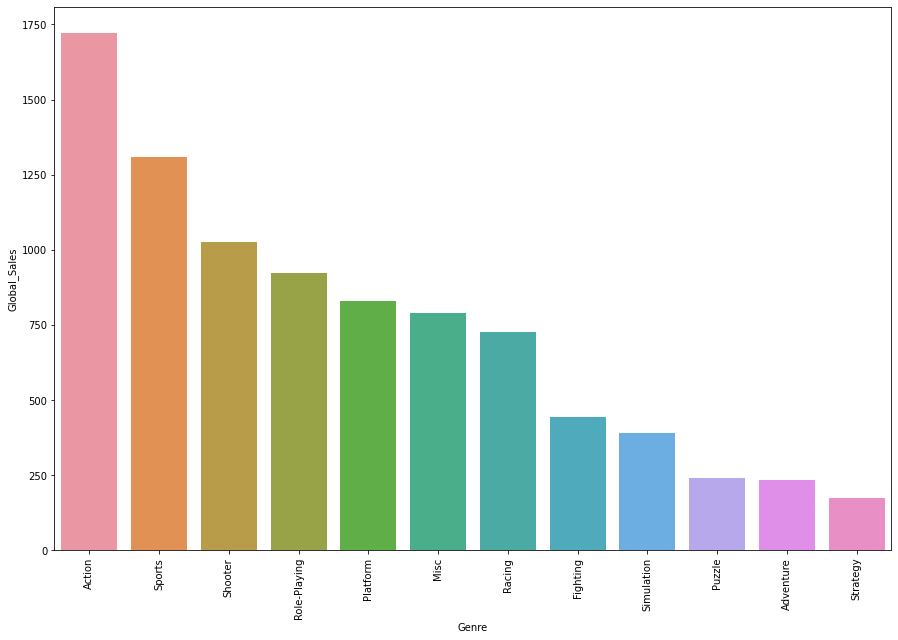

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=Sum_sales_genre)
plt.xticks(rotation=90)

### Ventas globales por plataforma

In [ ]:
##Agrupo las Plataformas por la suma de Global Sales. Selecciono los primeros 10 resultados con un head para simplificar la visual final.
df.groupby(by=['Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64

In [ ]:
##Asigno la agrupación a una variable llamada Sum_sales_platform
Sum_sales_platform = df.groupby(by=['Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
Sum_sales_platform = pd.DataFrame(Sum_sales_platform).reset_index()
Sum_sales_platform

,Platform,Global_Sales
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.91
5,PS,727.39
6,GBA,305.62
7,PSP,291.71
8,PS4,278.10
9,PC,254.70


Realizamos un gráfico de barras para visualizar los datos anteriores. Con un sort_values se ordenan de manera descendente para que sea más clara la respuesta: PS2 es la plataforma que generó mayor ingreso por ventas.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

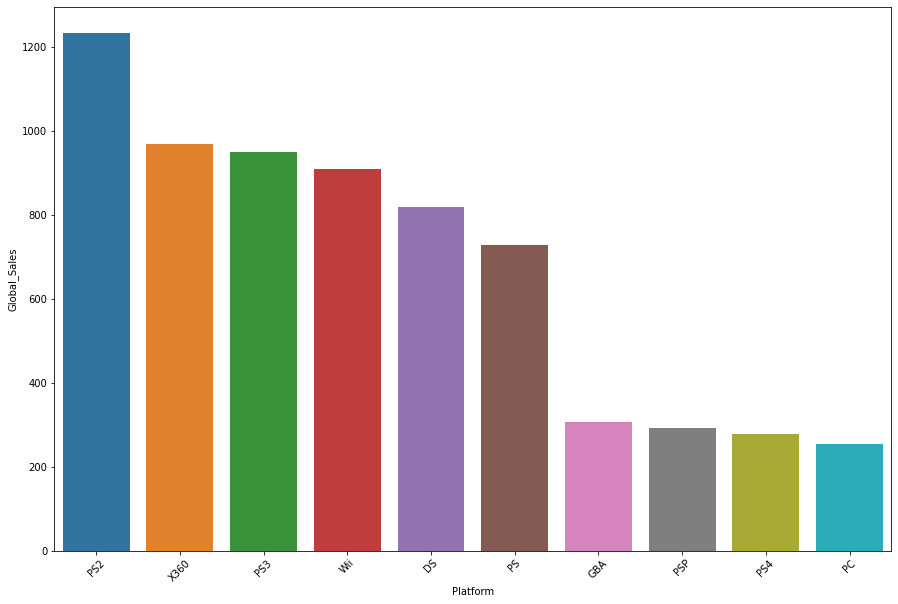

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=Sum_sales_platform)
plt.xticks(rotation=45)

### Ventas globales por editor

In [ ]:
##Agrupo los editores(Publisher) por la suma de Global Sales. Selecciono los primeros 10 resultados con un head para simplificar la visual final.
df.groupby(by=['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10)

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

In [ ]:
##Asigno el resultado anterior a una variable llamada Sum_sales_publisher
Sum_sales_publisher = df.groupby(by=['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
Sum_sales_publisher = pd.DataFrame(Sum_sales_publisher).reset_index()
Sum_sales_publisher

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


Con el resultado anterior realizamos un gráfico de barras que nos permite visualizar por orden descendiente qué editores lograron los mayores ingresos por venta. Respuesta a la pregunta: Nintendo es el editor que generó el mayor ingreso por ventas.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

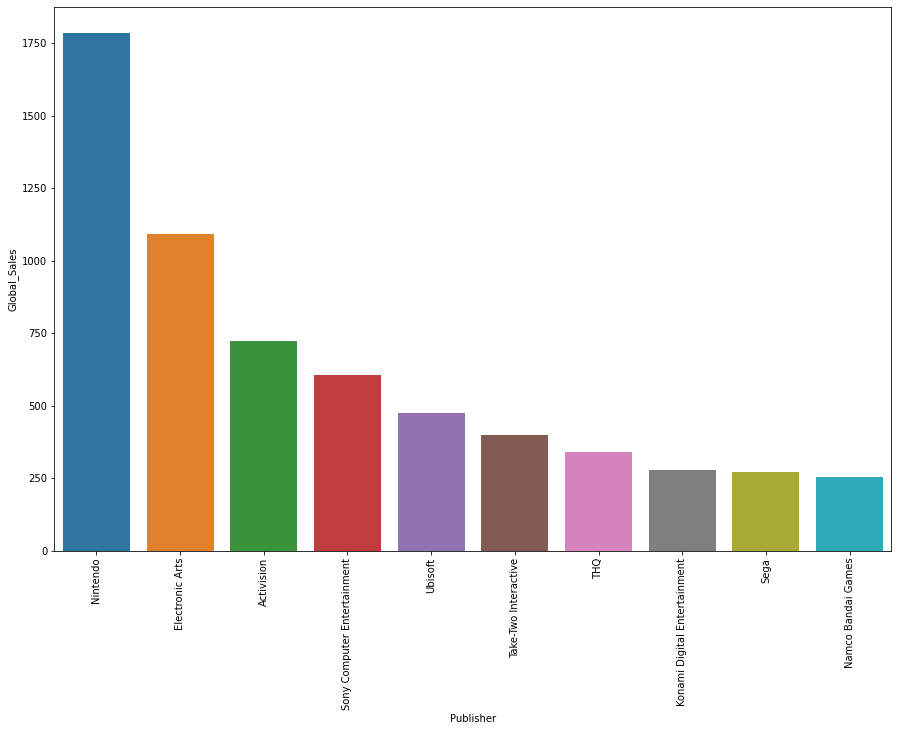

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Publisher", y="Global_Sales", data=Sum_sales_publisher)
plt.xticks(rotation=90)

### Año de mayor facturación global.

In [ ]:
df.Year

Rank
1        2006
2        1985
3        2008
4        2009
5        1996
         ... 
16596    2002
16597    2003
16598    2008
16599    2010
16600    2003
Name: Year, Length: 16291, dtype: int64

In [ ]:
##group by: agrupo la columna de año por la suma de Global_Sales.
Sum_Global_Sales_por_año = df.groupby("Year")["Global_Sales"].mean()
Sum_Global_Sales_por_año

Year
1980    1.264444
1981    0.777609
1982    0.801667
1983    0.987647
1984    3.597143
1985    3.852857
1986    1.765238
1987    1.358750
1988    3.148000
1989    4.320588
1990    3.086875
1991    0.786098
1992    1.771163
1993    0.766333
1994    0.654298
1995    0.402329
1996    0.757224
1997    0.695433
1998    0.676702
1999    0.743402
2000    0.577536
2001    0.687697
2002    0.477105
2003    0.461742
2004    0.556465
2005    0.489861
2006    0.516905
2007    0.507843
2008    0.475420
2009    0.466317
2010    0.477558
2011    0.454049
2012    0.554947
2013    0.674194
2014    0.581086
2015    0.430684
2016    0.207310
2017    0.016667
2020    0.290000
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Valor en millones')

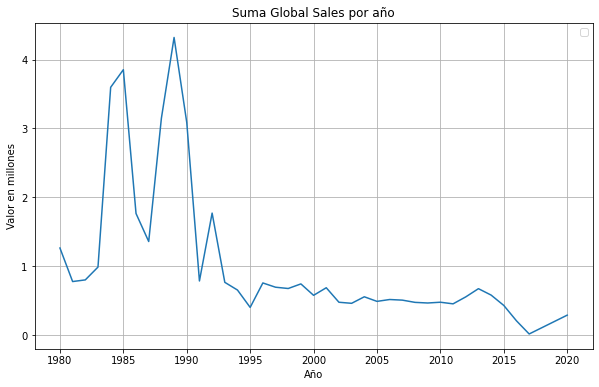

In [ ]:
##hago el grafico de líneas con esa variable que tiene dos columnas
fig,ax= plt.subplots(figsize=(10,6))
ax.plot(Sum_Global_Sales_por_año)

ax.legend()
ax.grid()
ax.set_title('Suma Global Sales por año')
ax.set_xlabel('Año')
ax.set_ylabel('Valor en millones')

### ¿Qué área (NA, EU, JP, Other) representa el mayor ingreso por ventas globales por año?.

In [ ]:
##En una variable llamada comp_year guardamos la selección de columnas que vamos a utilizar para responder esta pregunta.
comp_year = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
##En una segunda variable, utilizamos la información anterior para agruparla por año bajo la función de agregación sum.
comp_df = comp_year.groupby(by=['Year']).sum()
##sobreescribo la variable para guardarla con un index.
comp_df= comp_df.reset_index()
##Imprimo la variable.
comp_df

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,10.59,0.67,0.00,0.12
1,1981,33.40,1.96,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70
5,1985,33.73,4.74,14.56,0.92
6,1986,12.50,2.84,19.81,1.93
7,1987,8.46,1.41,11.63,0.20
8,1988,23.87,6.59,15.76,0.99
9,1989,45.15,8.44,18.36,1.50


In [ ]:
##Asigno la información de comp_df a comp_table (que la utilizaremos para crear una tabla que luego dinamizaremos)
comp_table = comp_df
##Dinamizamos la tabla
comp_table = pd.melt(comp_table, id_vars=['Year'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
##Imprimo la tabla dinamizada
comp_table

,Year,Sale_Area,Sale_Price
0,1980,NA_Sales,10.59
1,1981,NA_Sales,33.40
2,1982,NA_Sales,26.92
3,1983,NA_Sales,7.76
4,1984,NA_Sales,33.28
...,...,...,...
151,2014,Other_Sales,40.02
152,2015,Other_Sales,30.01
153,2016,Other_Sales,7.75
154,2017,Other_Sales,0.00


Con la tabla "comp_table" logramos realizar un gráfico de barras multivariado. Según podemos observar, Norteamérica es el área que representa el mayor ingreso por ventas.

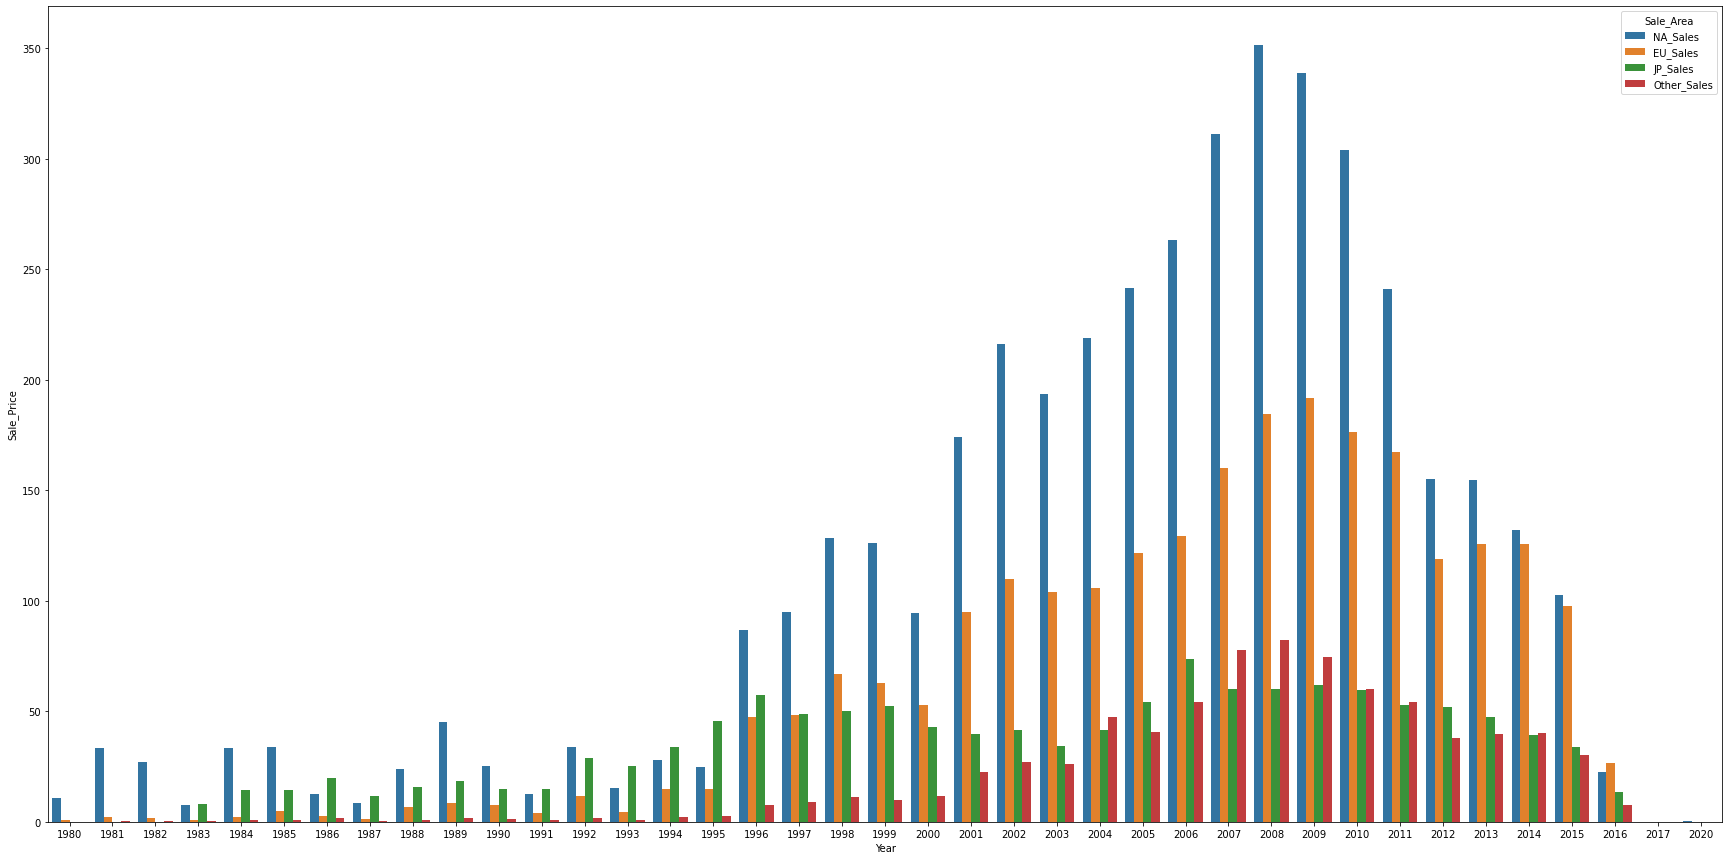

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Year', y='Sale_Price', hue='Sale_Area', data=comp_table)

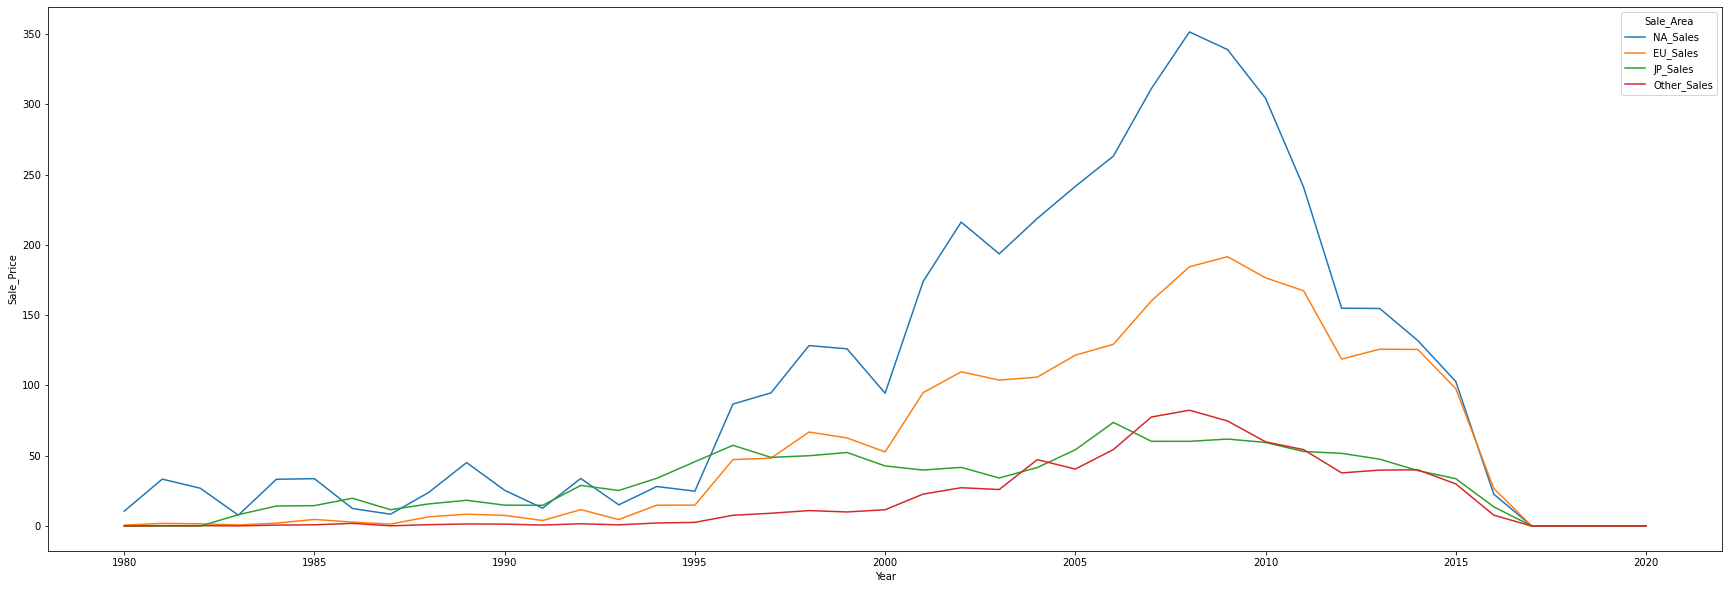

In [ ]:
## Gráfico de línea evolución de ventas por año, por área.
plt.figure(figsize=(30, 10))
sns.lineplot(x='Year', y='Sale_Price', hue='Sale_Area', data=comp_table)

**Insight**: Se observa un crecimiento en ventas mayor para Norteamérica y Europa, mientras que las demás zonas muestran un crecimiento menor. Se observa el pico más alto en el año 2008 que luego decrece en una fuerte pendiente para Norteamérica.

Asimismo, la evolución en las líneas de Japón y "otros" se mantiene en un rango de valores que no muestra tanta diferencia. Podríamos considerar que las ventas migraron de un área a otra.

##Preguntas de predicciones y posibles modelos para resolverlos.

¿Qué editor tiene mayor probabilidad de éxito a futuro? (modelo de clasificacion)
¿Es posible predecir los ingresos de ventas por Plataforma? (modelo de regresión)
¿Qué género será el que presente mayores probabilidades de aprobación en los consumidores? (modelo de clasificación)
¿Sobre qué plataforma habra que enfocarse para su desarrollo? (modelo de clasificación)


Podríamos encontrarnos frente a la siguiente hipótesis:
- Hipótesis nula: Las ventas a futuro serán mayores.
- Hipótesis alternativa: Las ventas a futuro no serán mayores. La variable target va a indicar que 0 no tiene mayor venta y 1 si tiene mayor venta.

Con estos datos también es posible predecir qué área (NA, EU, JP, Other) podría representar la mayor facturación en ventas a futuro.



#Análisis univariado sobre variables cualitativas

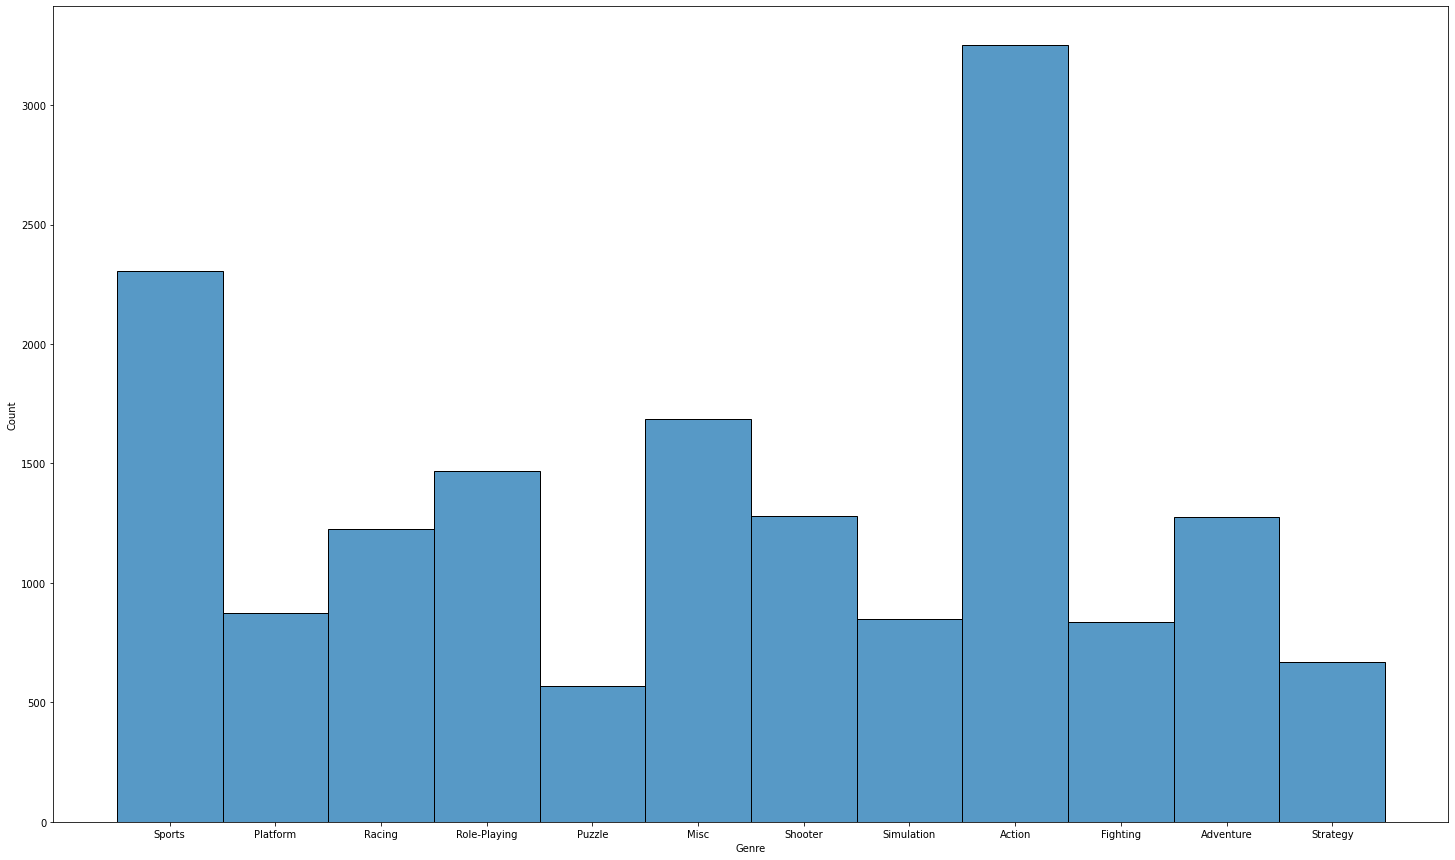

In [ ]:
##Distribución de géneros de videojuegos en histograma
plt.figure(figsize=(25, 15))
sns.histplot(data= df['Genre']) 
plt.show()

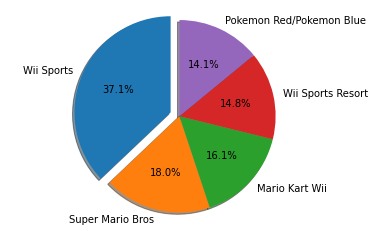

In [ ]:
#Distribución de ventas globales en el top 5 de videojuegos mas vendidos

labels = 'Wii Sports', 'Super Mario Bros', 'Mario Kart Wii', 'Wii Sports Resort','Pokemon Red/Pokemon Blue'
sizes = [82.74, 40.24, 35.82, 33,31.37]
explode = (0.1, 0, 0, 0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

#Análisis bivariado

Primero observamos las correlaciones generales del df:

In [ ]:
##Observamos primero la correlación del dataframe completo (analisis multivariado)
df.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


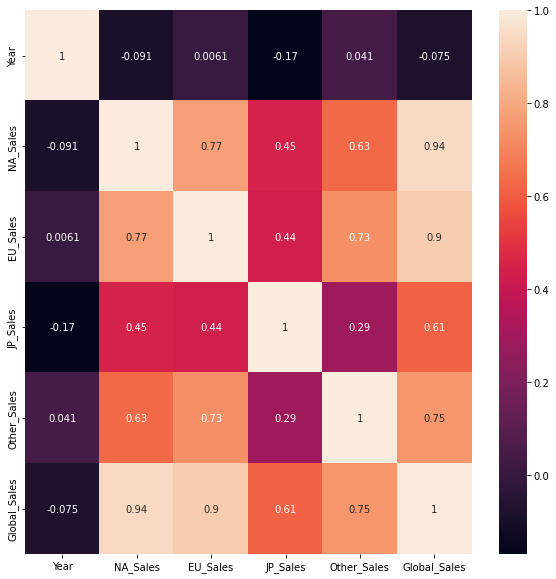

In [ ]:
##Hacemos un heatmap del df (analisis multivariado)
correlations = df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot=True)

Y ahora sí, comparamos dos variables entre sí:

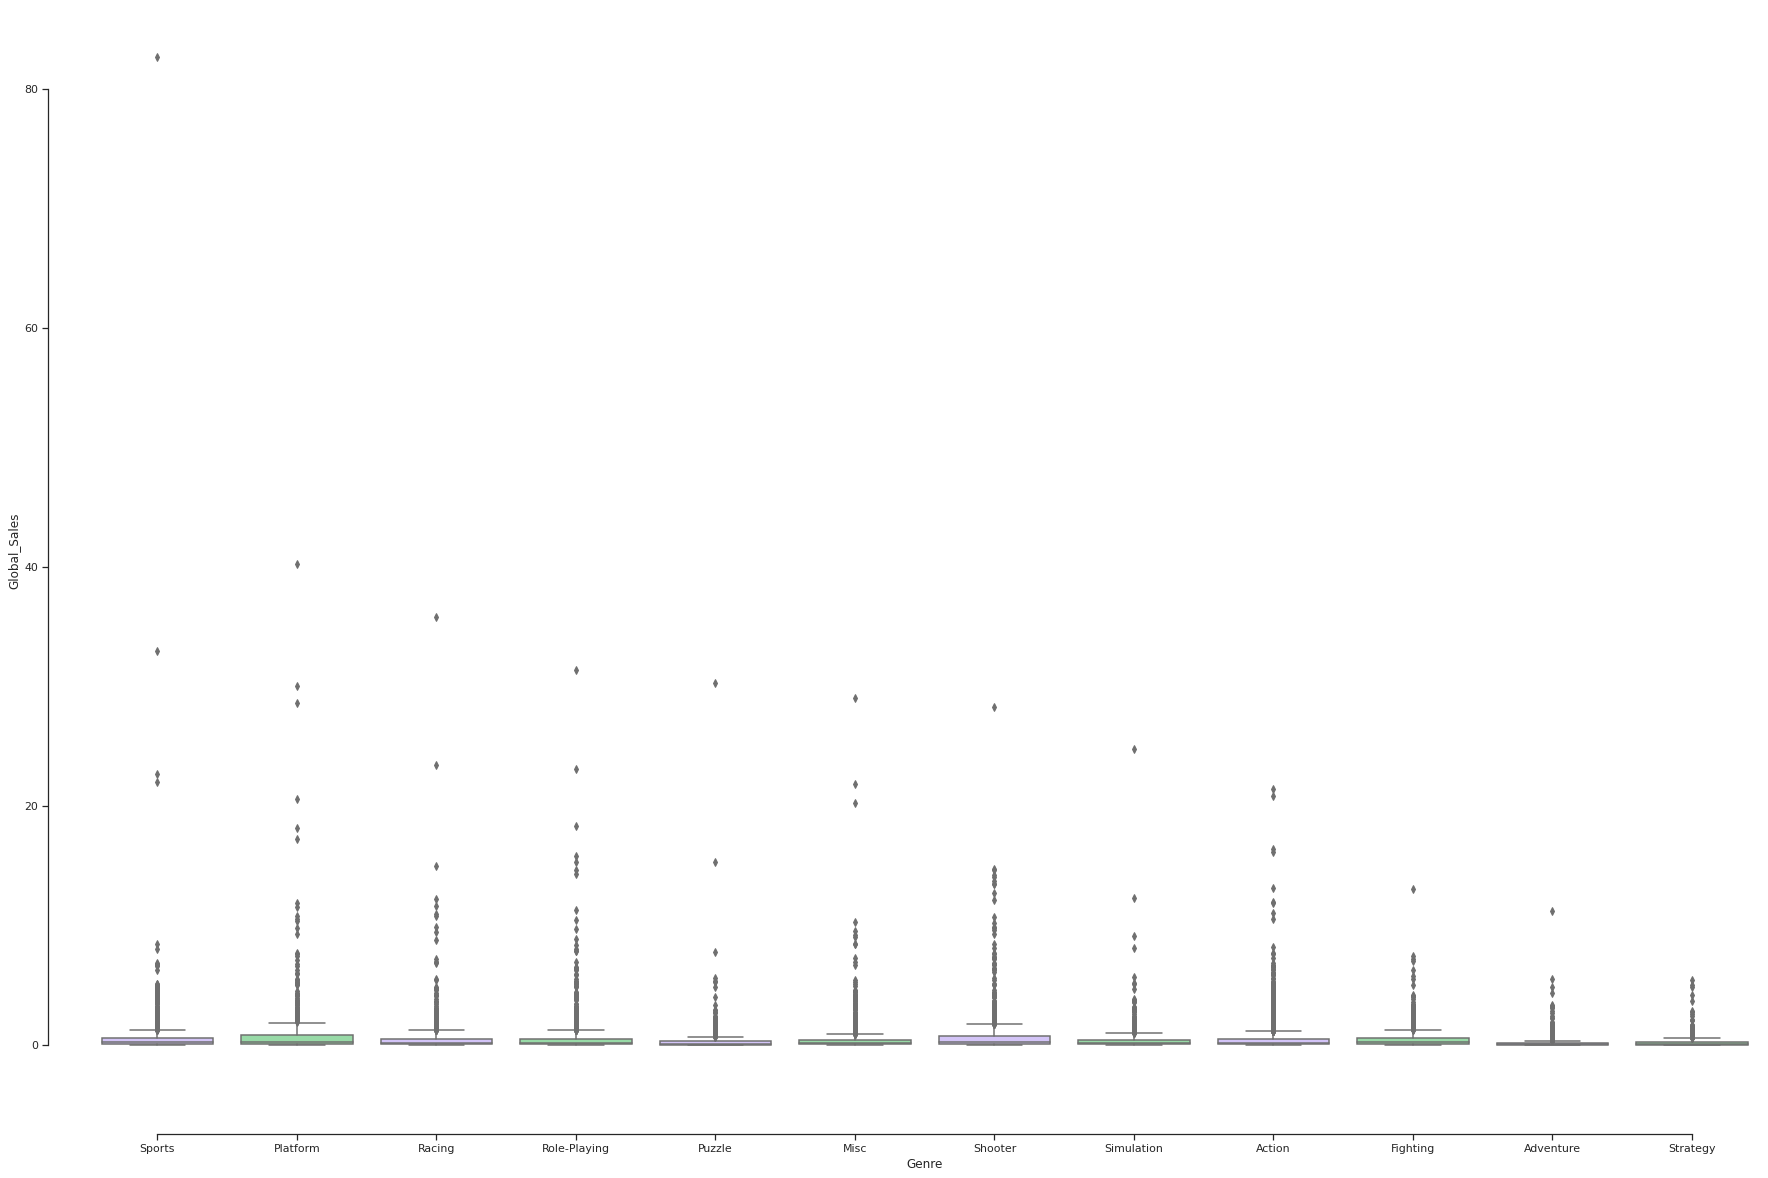

In [ ]:
#comparacion bivariada de ventas globales por genero (análisis bivariado)
plt.figure(figsize=(30, 20))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Genre", y="Global_Sales",
             palette=["m", "g"],
            data=df)
sns.despine(offset=40, trim=True)

Los outliers no nos permiten apreciar las cajas ni su distribución interna.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


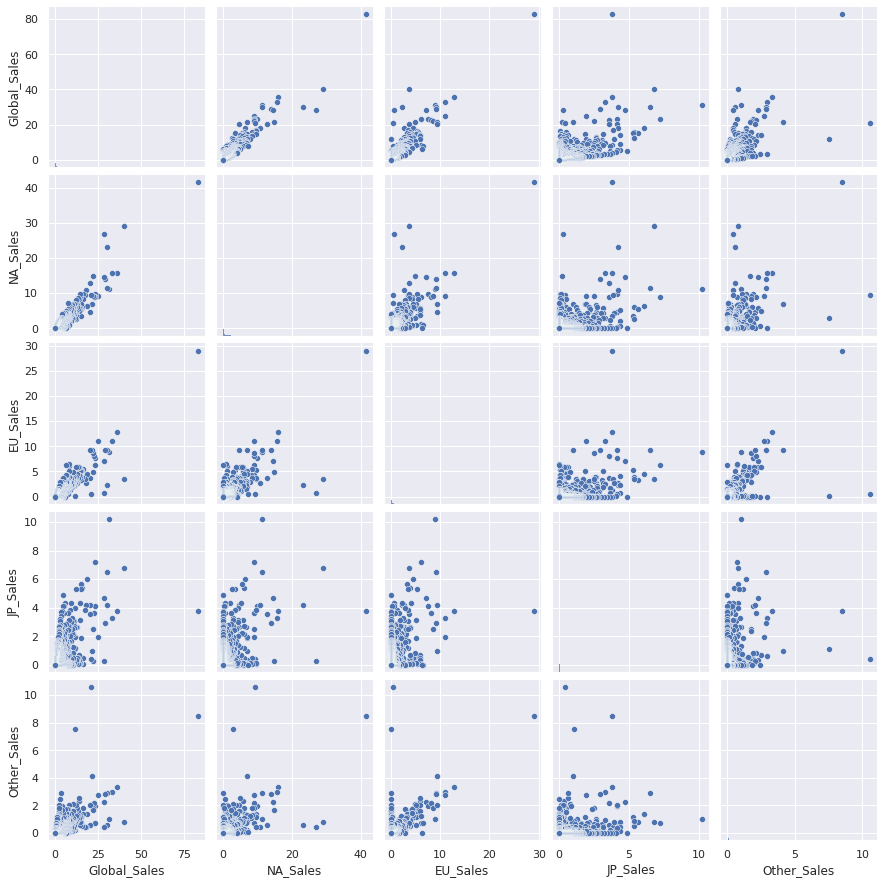

In [ ]:
# Diagramas de dispersión entre 'Global_Sales' y sus variables correlacionadas 
# Visualizamos el crecimiento de las ventas en las distintas areas geograficas con respecto a las ventas ea nivel global

sns.set()
cols = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sns.pairplot(df[cols], size = 2.5)
plt.show()


**Insight:** Preponderancia de las ventas por área con respecto a las ventas mundiales.
Observamos los gráficos de dispersión donde el eje Y muestra los valores de las ventas por área sobre Global_Sales en el eje X. Si la curva se acerca más al eje Y, quiere decir que la preponderancia de las ventas sobre esa área geográfica es alta. Si por el contrario, se acerca más al eje X, quiere decir que las ventas globales aumentan con mayor velocidad de lo que crecen en cada área. Entonces es posible observar qué tan grande es el crecimiento de ventas en cada área con respecto a las ventas globales.

Insight: Vemos entonces que Japón es el área que más preponderancia presenta con respecto a la evolución de ventas globales, comparada con el resto de las áreas.

Si miramos la línea de correlaciones de Japón (en donde JP esta volcado en el eje Y) con respecto a las demás áreas, en todos los casos vemos que su crecimiento es mayor.

Encontramos también que las ventas de Norteamérica tienen una correlación positiva muy fuerte con Global_Sales a lo largo del tiempo (lo reconfirmamos con el valor arrojado de 0.94 en el heatmap).

# Modelos

# Modelo de regresión (multivariado): Regresión lineal

Objetivo del modelo entre valores continuos: Predecir el valor de Y (Global_Sales) a partir de X (NA_Sales, EU_Sales, JP_Sales, Other_Sales	).

In [ ]:
df_regresion = df.copy()

In [ ]:
df_regresion

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [ ]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
df_regresion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.9+ MB


In [ ]:
##Seleccionamos las columnas con datos continuos
df_continuos = df_regresion[["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales",	"Global_Sales"]]

In [ ]:
df_continuos

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,
1,41.49,29.02,3.77,8.46,82.74
2,29.08,3.58,6.81,0.77,40.24
3,15.85,12.88,3.79,3.31,35.82
4,15.75,11.01,3.28,2.96,33.00
5,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16596,0.01,0.00,0.00,0.00,0.01
16597,0.01,0.00,0.00,0.00,0.01
16598,0.00,0.00,0.00,0.00,0.01


In [ ]:
df_continuos["Global_Sales"].value_counts("%") ##.unique()

0.02    0.064146
0.03    0.048800
0.04    0.038917
0.05    0.038303
0.01    0.036830
          ...   
4.98    0.000061
5.01    0.000061
5.05    0.000061
5.07    0.000061
3.16    0.000061
Name: Global_Sales, Length: 621, dtype: float64

In [ ]:
# seleccionamos features
X = df_continuos[["NA_Sales", "EU_Sales",	"JP_Sales",	"Other_Sales"]]
y = df_continuos[("Global_Sales")]

In [ ]:
print (X.shape)
print (y.shape)

(16291, 4)
(16291,)


In [ ]:
##Convertimos y (serie unidimensional) en una dataframe bidimensional.
y = pd.DataFrame(y)
print (X.shape)
print (y.shape)

(16291, 4)
(16291, 1)


In [ ]:
##importamos el modelo que vamos a utilizar
from sklearn import linear_model
model = linear_model.LinearRegression()
# fit model
model.fit(X, y)

LinearRegression()

In [ ]:
# prediccion Global_sales sobre los siguientes valores de X = 41.49,	29.02,	3.77,	8.46
model.predict([[41.49,29.02,3.77,8.46]])
print(f'El valor y para X= 41.49, 29.02, 3.77, 8.46 es: {model.predict([[41.49,29.02,3.77,8.46]])}')
print("--------------")

El valor y para X= 41.49, 29.02, 3.77, 8.46 es: [[82.73397684]]
--------------


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape

(12218, 4)

In [ ]:
X_test.shape

(4073, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [ ]:
reg_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred_1 = reg_1.predict(X_train)
y_pred_1 = reg_1.predict(X_test)

In [ ]:
reg_1.predict([[41.49,29.02,3.77,8.46]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[82.73380855]])

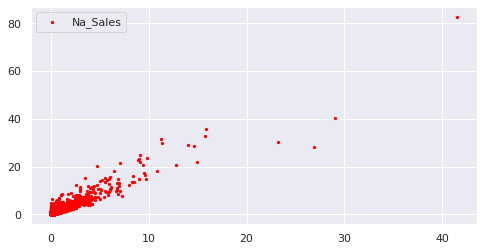

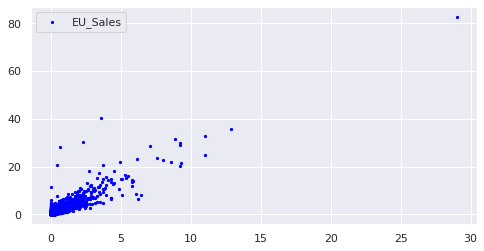

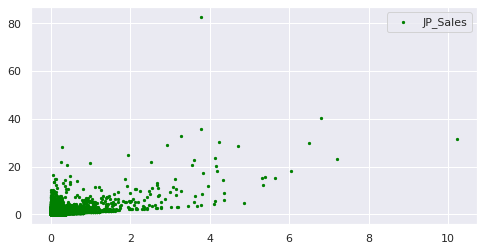

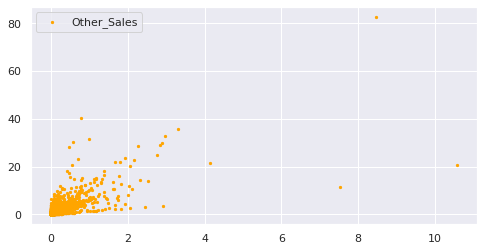

In [ ]:
##Observamos la relación de cada columna de "X" con respecto a "y".
fig,ax= plt.subplots(figsize=(8,4))
ax.scatter(X.NA_Sales,y, s = 5, label = 'Na_Sales', c="red")
plt.legend()
fig,ax= plt.subplots(figsize=(8,4))
ax.scatter(X.EU_Sales,y, s = 5, label = 'EU_Sales', c="blue")
plt.legend()
fig,ax= plt.subplots(figsize=(8,4))
ax.scatter(X.JP_Sales,y, s = 5, label = 'JP_Sales', c="green")
plt.legend()
fig,ax= plt.subplots(figsize=(8,4))
ax.scatter(X.Other_Sales,y, s = 5, label = 'Other_Sales', c="orange")
plt.legend()

Nuevamente los outliers de Global_Sales no permiten apreciar la distribución de los datos.

### Evaluando el modelo

Error cuadrático medio

In [ ]:
#Evaluaremos nuestro modelo de regresión con el método del error cuadrático medio
from sklearn.metrics import mean_squared_error

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 0.005203775003268012
Raíz del error cuadrático medio en Test: 0.005280794436204905


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


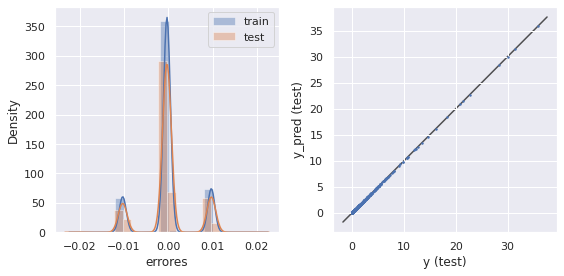

In [ ]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_1, bins = 20, label = 'train')
sns.distplot(y_test - y_pred_1, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_1, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

Ahora comparamos estos resultados de evaluación con 2 métricas más:
- error absoluto medio
- distancia media cuadrática mínima

In [ ]:
#Evaluación de Modelos
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))

Mean Absolute Error: 0.0029809294225615858
Mean Squared Error: 2.788678987745268e-05
Root Mean Squared Error: 0.005280794436204905


In [ ]:
metrics.max_error(y_test,y_pred_1)

0.02029031799611697

In [ ]:
metrics.median_absolute_error(y_test,y_pred_1)

0.00031557405403792593

Dado un conjunto de variables categóricas, se predice si
- Hipótesis nula: Las ventas a futuro serán mayores al promedio de Global_Sales histórico.
- Hipótesis alternativa: Las ventas a futuro no serán mayores al promedio de Global_Sales histórico.

La variable target va a indicar que 1 será mayor al promedio y 0 será menor o igual al promedio.

Objetivos:

Para X: Aplicaremos un encoder a la columna de Publisher donde se trabaje con 4 columnas:
o	0, 1 y 2 = los 3 Publishers más repetidos (a través de un sort_values)
o	4 = others

Para y: Nuestra variable target será Global_Sales, a la cual le eliminaremos los outliers ya que presenta una desviación estándar muy marcada que sesga la muestra.

#Tratamiento de outliers

A continuación, tratamos los outliers de la col Global_Sales para setear nuestra "y".

In [ ]:
##Generamos una copia del df original
df_outliers = df.copy()

In [ ]:
import scipy.stats as stats
# Encontramos el Q1 Y Q3 para la columna Global_Sales
Q1 = df_outliers["Global_Sales"].quantile(q=.25)
Q3 = df_outliers["Global_Sales"].quantile(q=.75)
print("Primer quartil", Q1)
print("tercer quartil",Q3)


Primer quartil 0.06
tercer quartil 0.48


In [ ]:
# Encontramos el rango inercuartil
IQR= Q3-Q1
print("rango intercuartil",IQR)

rango intercuartil 0.42


In [ ]:
BI = (Q1-1.5*IQR)
BS = (Q3+1.5*IQR)
print("bigote inferior",BI)
print("bigote superior",BS)

bigote inferior -0.5700000000000001
bigote superior 1.1099999999999999


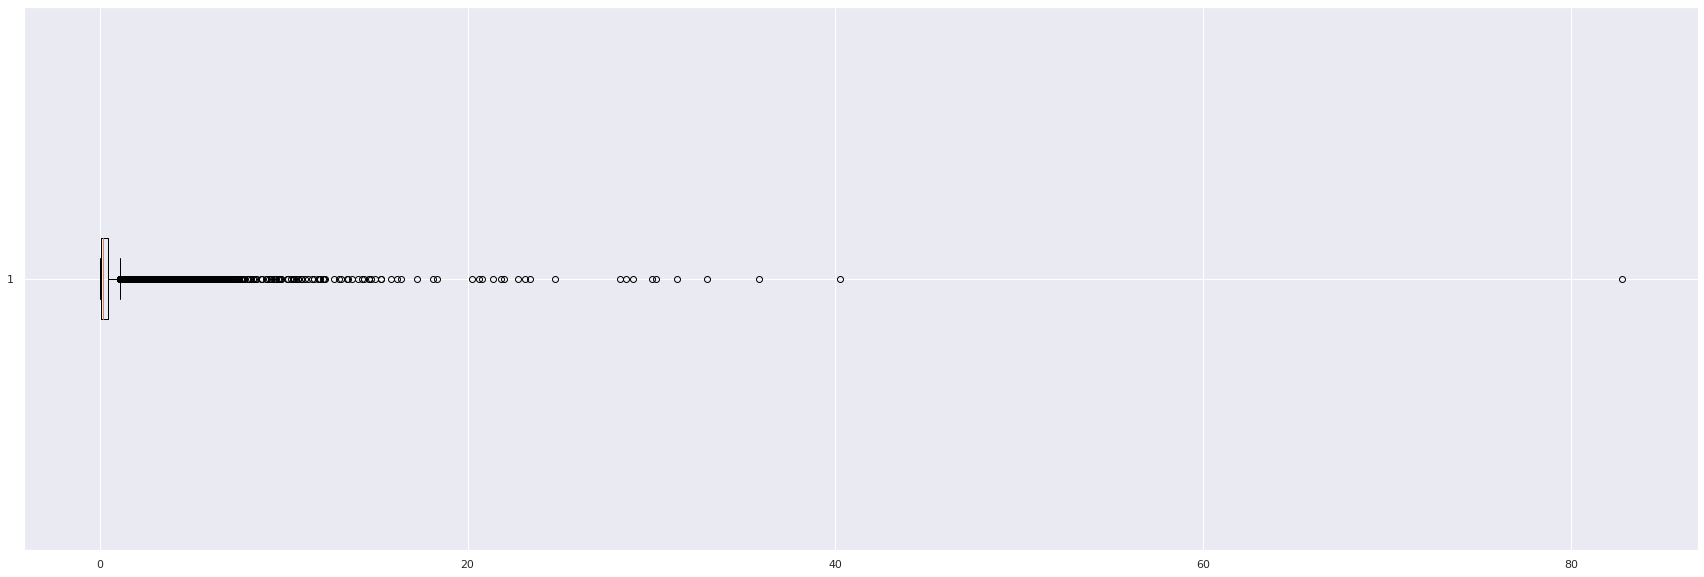

In [ ]:
plt.figure(figsize=(30, 10))
plt.boxplot(df_outliers["Global_Sales"],vert= False)

plt.show()

In [ ]:
UBICACION_OUTLIERS_INFERIOR = (df_outliers["Global_Sales"]<BI)
print("ubicacion outliers inferior", UBICACION_OUTLIERS_INFERIOR)

ubicacion outliers inferior Rank
1        False
2        False
3        False
4        False
5        False
         ...  
16596    False
16597    False
16598    False
16599    False
16600    False
Name: Global_Sales, Length: 16291, dtype: bool


In [ ]:
UBICACION_OUTLIERS_SUPERIOR = (df_outliers["Global_Sales"]>BS)
print("ubicacion outliers superior", UBICACION_OUTLIERS_SUPERIOR)

ubicacion outliers superior Rank
1         True
2         True
3         True
4         True
5         True
         ...  
16596    False
16597    False
16598    False
16599    False
16600    False
Name: Global_Sales, Length: 16291, dtype: bool


Al no encontrar outliers por debajo del bigote inferior nos quedamos solo con los valores que esten por encima del bigote superior.

In [ ]:
OUTLIERS = df_outliers[UBICACION_OUTLIERS_SUPERIOR]
print ("lista de outliers",OUTLIERS)

lista de outliers                              Name Platform  Year         Genre  \
Rank                                                             
1                      Wii Sports      Wii  2006        Sports   
2               Super Mario Bros.      NES  1985      Platform   
3                  Mario Kart Wii      Wii  2008        Racing   
4               Wii Sports Resort      Wii  2009        Sports   
5        Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
...                           ...      ...   ...           ...   
1844    Need for Speed: ProStreet      Wii  2007        Racing   
1845                     Pikmin 3     WiiU  2013      Strategy   
1846               Legend of Mana       PS  1999  Role-Playing   
1847       Lumines: Puzzle Fusion      PSP  2004        Puzzle   
1848  Toy Story 3: The Video Game      PS3  2010        Action   

                       Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank                                        

Encontramos 1826 valores que cumplen con la condicion de outliers lo que representa aproximadamente un 11% de nuestros datos.

In [ ]:
#Mostramos el nuevo df dejando de lado los valores atipicos
ubicacion_sin_outliers = (df_outliers["Global_Sales"]<=BS)
df_limpio = df_outliers[ubicacion_sin_outliers]
df_limpio

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1849,Guitar Hero 5,PS3,2009,Misc,Activision,0.53,0.40,0.00,0.17,1.10
1850,Megamania,2600,1981,Shooter,Activision,1.03,0.06,0.00,0.01,1.10
1851,Medal of Honor: Airborne,X360,2007,Shooter,Electronic Arts,0.45,0.53,0.01,0.12,1.10
1852,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,Nintendo,0.52,0.33,0.17,0.08,1.10
1853,Jungle Hunt,2600,1982,Platform,Atari,1.03,0.06,0.00,0.01,1.10
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [ ]:
##Calculamos el promedio en Global_Sales
promedio_globalsales = df_limpio['Global_Sales'].mean()
promedio_globalsales

0.23432077428275144

In [ ]:
##Asignamos una variable booleana donde True sea mayor al promedio de la columna y False, sea menor o igual.
mayor_al_promedio = df_limpio['Global_Sales']>promedio_globalsales 
mayor_al_promedio.head

<bound method NDFrame.head of Rank
1849      True
1850      True
1851      True
1852      True
1853      True
         ...  
16596    False
16597    False
16598    False
16599    False
16600    False
Name: Global_Sales, Length: 14465, dtype: bool>

In [ ]:
dfcopia_y = df_limpio.copy()

In [ ]:
dfcopia_y

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1849,Guitar Hero 5,PS3,2009,Misc,Activision,0.53,0.40,0.00,0.17,1.10
1850,Megamania,2600,1981,Shooter,Activision,1.03,0.06,0.00,0.01,1.10
1851,Medal of Honor: Airborne,X360,2007,Shooter,Electronic Arts,0.45,0.53,0.01,0.12,1.10
1852,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,Nintendo,0.52,0.33,0.17,0.08,1.10
1853,Jungle Hunt,2600,1982,Platform,Atari,1.03,0.06,0.00,0.01,1.10
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [ ]:
##Atribuimos 1 o 0 según el valor de Global Sales es mayor al promedio (1) o no (0).
dfcopia_y['Global_Sales'] = df_limpio['Global_Sales'].apply(lambda x: 1 if x == 'True' else 0)
dfcopia_y

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1849,Guitar Hero 5,PS3,2009,Misc,Activision,0.53,0.40,0.00,0.17,0
1850,Megamania,2600,1981,Shooter,Activision,1.03,0.06,0.00,0.01,0
1851,Medal of Honor: Airborne,X360,2007,Shooter,Electronic Arts,0.45,0.53,0.01,0.12,0
1852,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,Nintendo,0.52,0.33,0.17,0.08,0
1853,Jungle Hunt,2600,1982,Platform,Atari,1.03,0.06,0.00,0.01,0
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0


In [ ]:
dfcopia_y.Global_Sales.value_counts()

0    14465
Name: Global_Sales, dtype: int64

No logramos configurar las variables correctamente para el modelo de clasificación.
Problemas:

X = nuestras columnas categóricas presentan muchas variables cada una, más de las que funcionarían de forma optimizada en onehot o en un orderencoder. No logramos codificarlas como definimos en el objetivo del modelo de clasificación.

y= La columna Global_Sales final (que sería la variable target) arroja todos los valroes en 0.


# **PCA**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df_continuos.tail()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,
16596,0.01,0.00,0.0,0.0,0.01
16597,0.01,0.00,0.0,0.0,0.01
16598,0.00,0.00,0.0,0.0,0.01
16599,0.00,0.01,0.0,0.0,0.01
16600,0.01,0.00,0.0,0.0,0.01


In [ ]:
#Trabajamos sobre nuestro modelo de regresion lineal
#Dividimos la matriz del dataset en dos partes

X_pca = df_continuos.iloc[:,0:4].values
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas

y_pca = df_continuos.iloc[:,4].values
# El vector y contiene los valores de la cuarta columna (global_sales) para todas las filas


In [ ]:
#Normalizamos los datos de la matriz

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_pca)

In [ ]:
# Para encontrar las componentes principales de nuestro dataset, primero calculamos la matriz de covarianza que nos da la medida de dispersion conjunta entre variables

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[1.00006139 0.76897019 0.4513112  0.63455733]
 [0.76897019 1.00006139 0.43640591 0.72630092]
 [0.4513112  0.43640591 1.00006139 0.29057701]
 [0.63455733 0.72630092 0.29057701 1.00006139]]


In [ ]:
#Calculamos los autovectores de la matriz de covarianza o sea la direccion en la que la variaza aumenta

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.54146073  0.4998731   0.67300844  0.06329926]
 [ 0.55800645 -0.80312512  0.13238644  0.16153227]
 [ 0.37412199  0.03967284 -0.24645753 -0.89315031]
 [ 0.50545209  0.32178097 -0.68468398  0.41494945]]

Eigenvalues 
[2.69672016 0.20888855 0.34048711 0.75414973]


In [ ]:
#Descartamos los autovectores cuyos autovalores sean más bajos, ya que son aquellos que menos información aportan al conjunto global

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas en orden descendente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden descendente
print('Autovalores en orden descendente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendente:
2.6967201577974267
0.7541497326804996
0.34048710903972695
0.20888854989916933


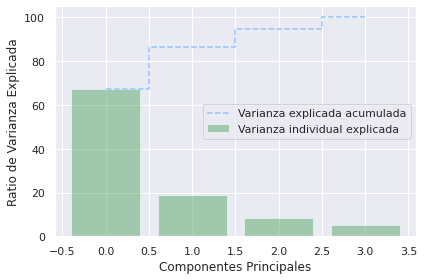

In [ ]:
#Para seleccionar la cantidad de dimensiones que va a tener nuestro dataset luego del proceso de PCA, usaremos una métrica que se conoce como “varianza explicada”, que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.

# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(4), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
#En la grafica se aprecia claramente que la primera componente representa el mayor porcentaje de la varianza de los datos (aproximadamente el 65%), mientras que la segunda se acerca al 20%.
#La tercera y cuarta componente podrian ser descartadas ya que las primeras dos explican cerca del 85% de la varianza.

In [ ]:
#Proyectamos los datos sobre un espacio de dimensionalidad menor

#Creamos la matriz de proyeccion a partir de los autovalores principales

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[ 0.54146073  0.06329926]
 [ 0.55800645  0.16153227]
 [ 0.37412199 -0.89315031]
 [ 0.50545209  0.41494945]]


In [ ]:
#De esta manera nuestro dataset se reduce de 4 dimensiones que tenia originalmente a solo 2

#Modelo de aprendizaje no supervisado: KMEANS

In [ ]:
df_kmeans = df.copy()

In [ ]:
df_kmeans

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [ ]:
#Generamos nuestra x
X = df_kmeans.iloc[:, 5:9].values

In [ ]:
X

array([[4.149e+01, 2.902e+01, 3.770e+00, 8.460e+00],
       [2.908e+01, 3.580e+00, 6.810e+00, 7.700e-01],
       [1.585e+01, 1.288e+01, 3.790e+00, 3.310e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e-02, 0.000e+00, 0.000e+00],
       [1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00]])

Nos quedamos con las columnas 5, 6, 7 y 8 que corresponden a las ventas por región (no trabajaremos con Global_Sales ya que es nuestra variable target, y en este caso buscamos entrenar un modelo de aprendizaje no supervisado). 

##Método del codo

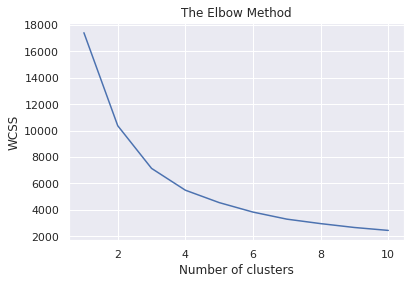

In [ ]:
# Metodo del Codo para encontrar el numero optimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Creando el k-Means para los 4 grupos encontrados

En el bloque anterior, generamos los clusters para valores de 1 a 10 (en el rango de 1 a 11) y obtenemos para cada uno de ellos, la suma de las distancias con el tributo inertia_ del objeto kmeans. En la gráfica observamos que la disminución en la suma de las distancias se atenúa cuando el número de clusters es igual a 4, por lo que, para este caso práctico, **el número óptimo de clusters será de 4**.

In [ ]:
# Creando el k-Means para los 4 grupos encontrados
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([2, 2, 3, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_kmeans['pred']=y_kmeans
df_kmeans

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pred
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0


In [ ]:
df_kmeans.groupby(['pred']).mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
pred,,,,,,
0,2006.498243,0.145592,0.078231,0.057424,0.027284,0.308835
1,2004.883178,1.732850,1.015584,0.292196,0.313925,3.354311
2,1991.000000,30.175000,8.872500,3.770000,2.570000,45.387500
3,2005.492308,7.484000,4.611846,2.103077,1.394923,15.593385


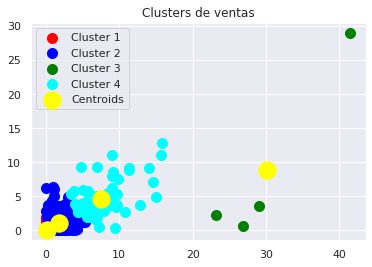

In [ ]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters de ventas')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

# **Crossvalidation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
df_cross =df_kmeans

In [ ]:
df_kmeans.tail

<bound method NDFrame.tail of                                                    Name Platform  Year  \
Rank                                                                     
1                                            Wii Sports      Wii  2006   
2                                     Super Mario Bros.      NES  1985   
3                                        Mario Kart Wii      Wii  2008   
4                                     Wii Sports Resort      Wii  2009   
5                              Pokemon Red/Pokemon Blue       GB  1996   
...                                                 ...      ...   ...   
16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16597                     Men in Black II: Alien Escape       GC  2003   
16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16599                                        Know How 2       DS  2010   
16600                                  Spirits & Spells      GBA  2003   

       

In [ ]:
bosque = RandomForestClassifier()

In [ ]:
bosque.fit(df_cross[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].values,
           df_cross["pred"].values)

RandomForestClassifier()

In [ ]:
print(cross_val_score(bosque,
                      df_cross[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].values,
           df_cross["pred"].values,
           cv=4).mean())

0.9144354630401846


In [ ]:
print(bosque.score(df_cross[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].values,
           df_cross["pred"].values))

1.0


Los cambios en la performance del modelo se deben a que la validacion cruzada selecciona 4 pliegues distintos a los cuales los somente a una iteracion por lo que el modelo tiene un entrenamiento mas realista a la hora de predecir resultados.